In [1]:
import os
import math
from typing import *

import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import pyplot
from tensorflow import keras 

In [2]:
neuroresults_random1=pd.read_csv('neuroresults_random1',sep="\t")
neuroresults_random2=pd.read_csv('neuroresults_random2',sep="\t")
neuroresults_random3=pd.read_csv('neuroresults_random3',sep="\t")
print(neuroresults_random1.shape)
print(neuroresults_random2.shape)
print(neuroresults_random3.shape)

(1043387, 42)
(1037730, 42)
(1037556, 42)


In [3]:
#Data preparation

print(neuroresults_random1.isnull().any().any())
print(neuroresults_random2.isnull().any().any())
print(neuroresults_random3.isnull().any().any())



False
False
False


In [4]:
neuroresults_random1.head(20)

,Experiment,Run,Subrun,Event,Track,nTracks,Expert,iNodes,oNodes,SL0-relID,...,SL7-alpha,SL8-relID,SL8-driftT,SL8-alpha,RecoZ,RecoTheta,ScaleZ,RawZ,ScaleTheta,RawTheta
0,20,738,0,13824,0,5,0,27,2,0.000000,...,-0.239288,0.000000,0.000000,0.000000,0.555959,0.337421,0.444756,1822,0.190575,781
1,20,738,0,13824,1,5,0,27,2,0.000000,...,-0.239288,0.000000,0.000000,0.000000,0.555959,0.337421,0.444756,1822,0.190575,781
2,20,738,0,13824,2,5,0,27,2,0.000000,...,-0.239288,0.000000,0.000000,0.000000,0.555959,0.337421,0.529239,2168,0.271151,1111
3,20,738,0,13824,3,5,0,27,2,0.000000,...,-0.159696,0.000000,0.000000,0.000000,0.555959,0.337421,0.267489,1096,-0.015505,-63
4,20,738,0,13824,4,5,0,27,2,0.000000,...,-0.159696,0.783737,0.000000,-0.178484,0.555959,0.337421,0.437675,1793,0.169821,696
5,20,738,0,36864,0,5,3,27,2,0.000000,...,0.159696,0.216253,0.000000,0.178484,0.555036,0.368713,0.476010,1950,0.289952,1188
6,20,738,0,36864,1,5,3,27,2,0.000000,...,0.159696,0.216253,0.000000,0.178484,0.555036,0.368713,0.538518,2206,0.370773,1519
7,20,738,0,36864,2,5,3,27,2,0.000000,...,0.159696,0.216253,0.000000,0.178484,0.555036,0.368713,0.529239,2168,0.346112,1418
8,20,738,0,36864,3,5,3,27,2,0.000000,...,0.159696,-0.983748,0.000000,0.178484,0.555036,0.368713,0.426932,1749,0.287755,1179
9,20,738,0,36864,4,5,3,27,2,0.000000,...,0.159696,-0.983748,0.000000,0.178484,0.555036,0.368713,0.594677,2436,0.380784,1560


<AxesSubplot:>

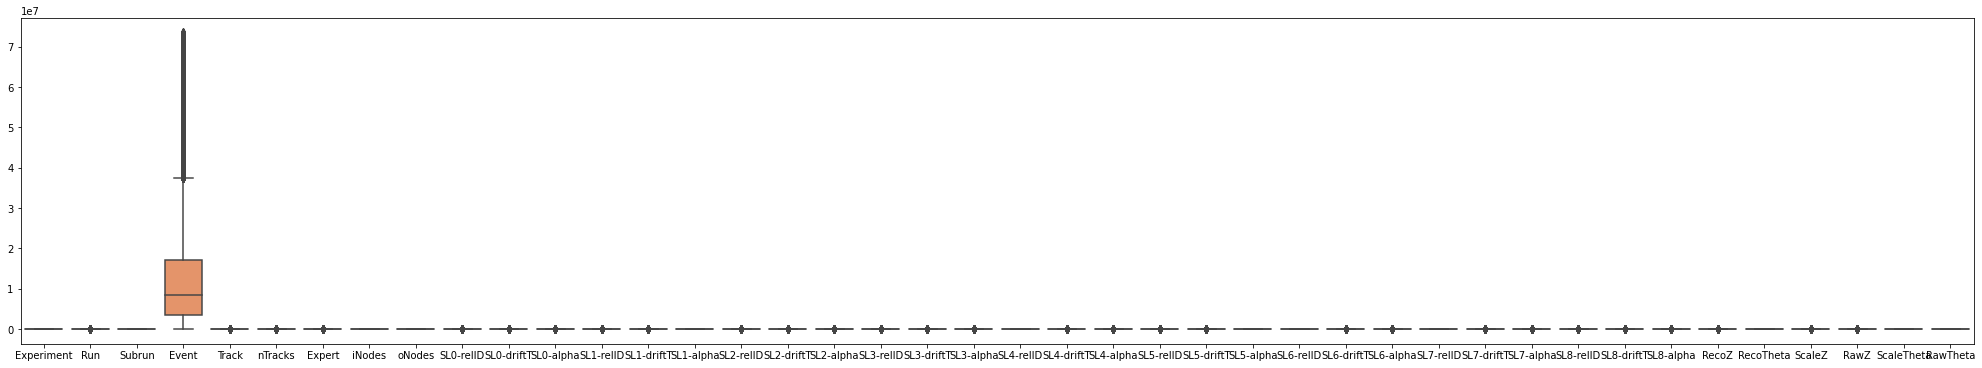

In [5]:
#so we have no nan values, now lets look at the data distribution 
plot_dims = (35, 6)
fig, ax = pyplot.subplots(figsize=plot_dims)
sns.boxplot(data=neuroresults_random1, ax=ax)


Build the Basic Model

In [6]:
data = pd.concat([neuroresults_random1,neuroresults_random2,neuroresults_random3 ])
data_expert_0 = data[data['Expert'] == 0]
data_expert_0.shape

(2429627, 42)

In [7]:
from sklearn.utils import shuffle

inpval=['SL0-relID','SL0-driftT','SL0-alpha','SL1-relID','SL1-driftT','SL1-alpha','SL2-relID','SL2-driftT',
        'SL2-alpha','SL3-relID','SL3-driftT','SL3-alpha','SL4-relID','SL4-driftT','SL4-alpha','SL5-relID',
        'SL5-driftT','SL5-alpha','SL6-relID','SL6-driftT','SL6-alpha','SL7-relID','SL7-driftT','SL7-alpha',
        'SL8-relID','SL8-driftT','SL8-alpha']
outpval=['RecoZ','RecoTheta']
nrr1_basicmodel_X, nrr1_basicmodel_Y = shuffle(data_expert_0[inpval], data_expert_0[outpval])


<AxesSubplot:>

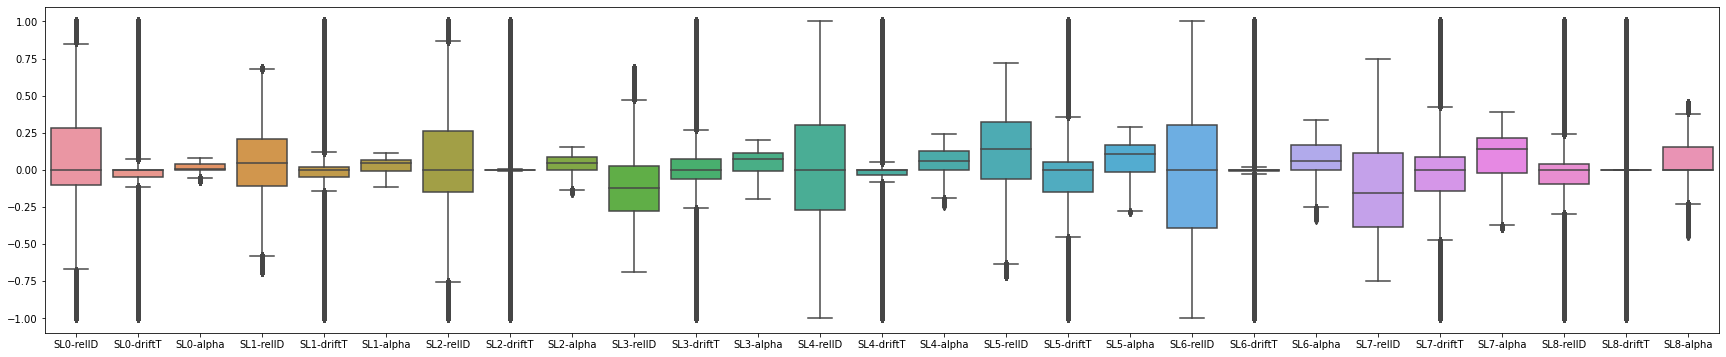

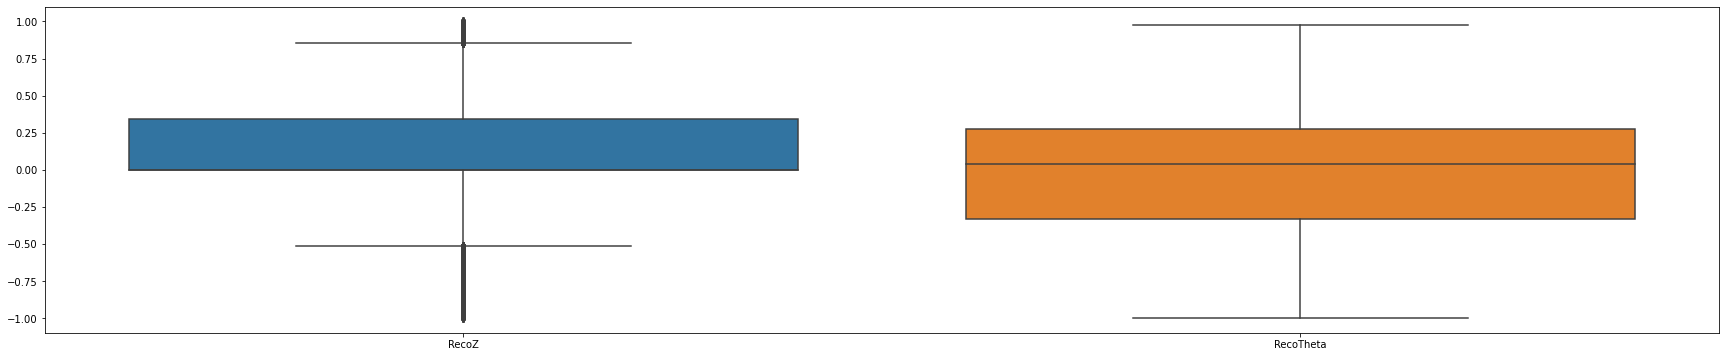

In [8]:
#so we have no nan values, now lets look at the data distribution 
plot_dims = (30, 6)
fig, ax1 = pyplot.subplots(figsize=plot_dims)
fig, ax2 = pyplot.subplots(figsize=plot_dims)
sns.boxplot(data=nrr1_basicmodel_X, ax=ax1)
sns.boxplot(data=nrr1_basicmodel_Y, ax=ax2)


We can see that the Data is already prepared. So lets look more into it

Text(0.5, 1.0, 'Correlation Heatmap')

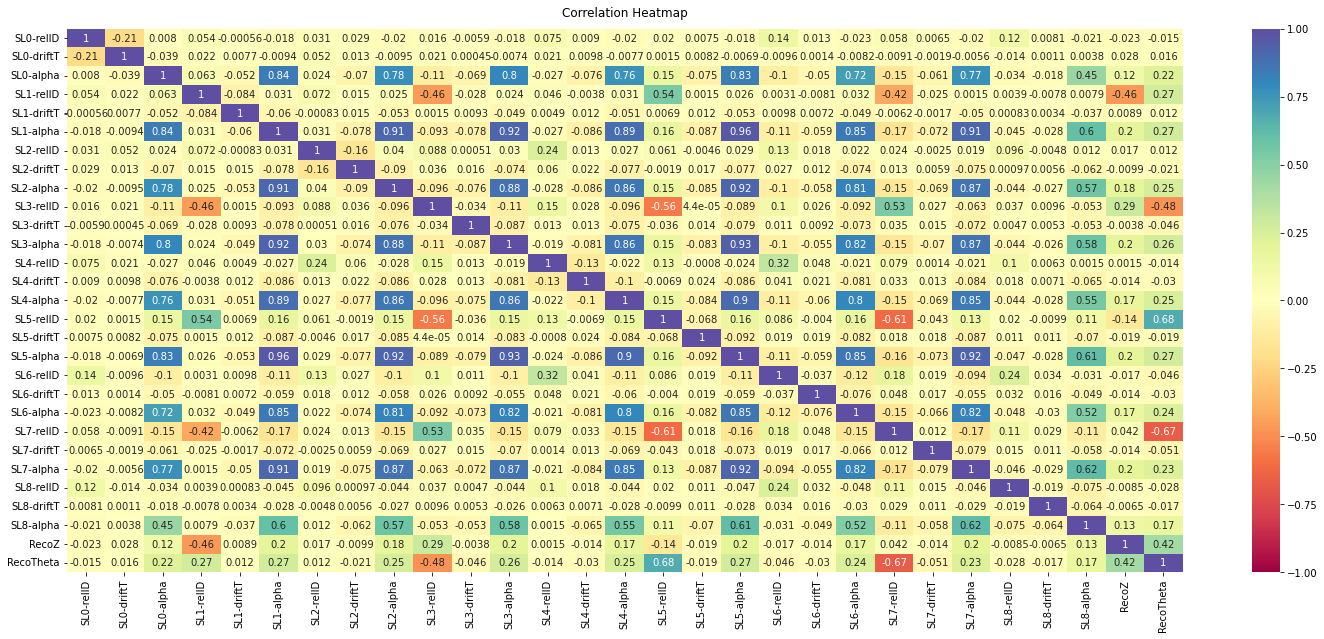

In [9]:
plt.figure(figsize=(25, 10))
variables = inpval+outpval
data = neuroresults_random1[variables]
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap="Spectral")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

<function matplotlib.pyplot.show(close=None, block=None)>

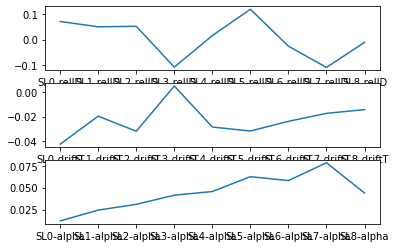

<Figure size 432x288 with 0 Axes>

In [10]:
rellDs=['SL0-relID','SL1-relID','SL2-relID','SL3-relID','SL4-relID','SL5-relID',
        'SL6-relID','SL7-relID','SL8-relID']
rellDsvals=neuroresults_random1[rellDs]
meanrellDsvals=rellDsvals.mean()
driftTs=['SL0-driftT','SL1-driftT','SL2-driftT','SL3-driftT','SL4-driftT','SL5-driftT',
         'SL6-driftT','SL7-driftT','SL8-driftT']
driftTsvals=neuroresults_random1[driftTs]
meandriftTsvals=driftTsvals.mean()
alphas=['SL0-alpha','SL1-alpha','SL2-alpha','SL3-alpha','SL4-alpha','SL5-alpha','SL6-alpha',
        'SL7-alpha','SL8-alpha']
alphasvals=neuroresults_random1[alphas]
meanalphasvals=alphasvals.mean()
figure, axis = plt.subplots(3, 1)
f = plt.figure()
axis[0].plot(meanrellDsvals)
axis[1].plot(meandriftTsvals)
axis[2].plot(meanalphasvals)
plt.show

In [11]:
nrr1_basicmodel_X_short=nrr1_basicmodel_X.iloc[0:100000]
nrr1_basicmodel_Y_short=nrr1_basicmodel_Y.iloc[0:100000]

# Start with Modeling

Searching for the best parameters

In [12]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

In [15]:
batch_size = [16,32,64,128]
optimizer = ['SGD', 'RMSprop', 'Adam']

parameters = dict(batch_size=batch_size,optimizer=optimizer)

def create_model(optimizer = 'adam'): 
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dropout(0.2,input_dim=27))
    model.add(tf.keras.layers.Dense(81, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    # compile the keras model
    model.compile(loss='mse', metrics=['mse'])
    return model 

model = KerasRegressor(model=create_model)
grid = GridSearchCV(estimator=model,param_grid=parameters,cv=3,verbose=0)
grid_result = grid.fit(nrr1_basicmodel_X_short,nrr1_basicmodel_Y_short,epochs=40, callbacks = early_stoping, validation_split = 0.15 )   

Epoch 1/20
3542/3542 [==============================] - 12s 3ms/step - loss: 0.0775 - mse: 0.0775 - val_loss: 0.0717 - val_mse: 0.0717
Epoch 2/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0743 - mse: 0.0743 - val_loss: 0.0682 - val_mse: 0.0682
Epoch 3/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0729 - mse: 0.0729 - val_loss: 0.0688 - val_mse: 0.0688
Epoch 4/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0718 - mse: 0.0718 - val_loss: 0.0675 - val_mse: 0.0675
Epoch 5/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0712 - mse: 0.0712 - val_loss: 0.0657 - val_mse: 0.0657
Epoch 6/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0708 - mse: 0.0708 - val_loss: 0.0663 - val_mse: 0.0663
Epoch 7/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0705 - mse: 0.0705 - val_loss: 0.0659 - val_mse: 0.0659
Epoch 8/20
3542/3542 [==============================] -

2084/2084 [==============================] - 2s 939us/step
Epoch 1/20
3542/3542 [==============================] - 12s 3ms/step - loss: 0.0777 - mse: 0.0777 - val_loss: 0.0698 - val_mse: 0.0698
Epoch 2/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0745 - mse: 0.0745 - val_loss: 0.0682 - val_mse: 0.0682
Epoch 3/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0732 - mse: 0.0732 - val_loss: 0.0686 - val_mse: 0.0686
Epoch 4/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0721 - mse: 0.0721 - val_loss: 0.0665 - val_mse: 0.0665
Epoch 5/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0713 - mse: 0.0713 - val_loss: 0.0661 - val_mse: 0.0661
Epoch 6/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0710 - mse: 0.0710 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 7/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0706 - mse: 0.0706 - val_loss: 0.0655 - val_mse: 0.0

3542/3542 [==============================] - 12s 3ms/step - loss: 0.0684 - mse: 0.0684 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 20/20
2084/2084 [==============================] - 2s 818us/step
Epoch 1/20
3542/3542 [==============================] - 12s 3ms/step - loss: 0.0776 - mse: 0.0776 - val_loss: 0.0705 - val_mse: 0.0705
Epoch 2/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0746 - mse: 0.0746 - val_loss: 0.0676 - val_mse: 0.0676
Epoch 3/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0731 - mse: 0.0731 - val_loss: 0.0685 - val_mse: 0.0685
Epoch 4/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0720 - mse: 0.0720 - val_loss: 0.0663 - val_mse: 0.0663
Epoch 5/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0709 - mse: 0.0709 - val_loss: 0.0672 - val_mse: 0.0672
Epoch 6/20
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0706 - mse: 0.0706 - val_loss: 0.0657 - val_mse: 0.

3542/3542 [==============================] - 12s 3ms/step - loss: 0.0685 - mse: 0.0685 - val_loss: 0.0631 - val_mse: 0.0631
Epoch 19/20
3542/3542 [==============================] - 12s 3ms/step - loss: 0.0685 - mse: 0.0685 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 20/20
2084/2084 [==============================] - 2s 855us/step
Epoch 1/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0781 - mse: 0.0781 - val_loss: 0.0703 - val_mse: 0.0703
Epoch 2/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0745 - mse: 0.0745 - val_loss: 0.0693 - val_mse: 0.0693
Epoch 3/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0733 - mse: 0.0733 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 4/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0721 - mse: 0.0721 - val_loss: 0.0669 - val_mse: 0.0669
Epoch 5/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0715 - mse: 0.0715 - val_loss: 0.0660 - val_mse: 0.0660

1771/1771 [==============================] - 6s 3ms/step - loss: 0.0687 - mse: 0.0687 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 18/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0684 - mse: 0.0684 - val_loss: 0.0631 - val_mse: 0.0631
Epoch 19/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0683 - mse: 0.0683 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 20/20
1042/1042 [==============================] - 1s 856us/step
Epoch 1/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0783 - mse: 0.0783 - val_loss: 0.0707 - val_mse: 0.0707
Epoch 2/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0747 - mse: 0.0747 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 3/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0730 - mse: 0.0730 - val_loss: 0.0672 - val_mse: 0.0672
Epoch 4/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0722 - mse: 0.0722 - val_loss: 0.0667 - val_mse: 0.0667


1771/1771 [==============================] - 6s 3ms/step - loss: 0.0687 - mse: 0.0687 - val_loss: 0.0634 - val_mse: 0.0634
Epoch 17/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0686 - mse: 0.0686 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 18/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0684 - mse: 0.0684 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 19/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0682 - mse: 0.0682 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 20/20
1042/1042 [==============================] - 1s 832us/step
Epoch 1/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0778 - mse: 0.0778 - val_loss: 0.0700 - val_mse: 0.0700
Epoch 2/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0743 - mse: 0.0743 - val_loss: 0.0691 - val_mse: 0.0691
Epoch 3/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0732 - mse: 0.0732 - val_loss: 0.0678 - val_mse: 0.0678

1771/1771 [==============================] - 6s 3ms/step - loss: 0.0684 - mse: 0.0684 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 16/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0682 - mse: 0.0682 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 17/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0682 - mse: 0.0682 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 18/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0679 - mse: 0.0679 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 19/20
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0684 - mse: 0.0684 - val_loss: 0.0632 - val_mse: 0.0632
Epoch 20/20
1042/1042 [==============================] - 1s 887us/step
Epoch 1/20
886/886 [==============================] - 3s 4ms/step - loss: 0.0798 - mse: 0.0798 - val_loss: 0.0713 - val_mse: 0.0713
Epoch 2/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0749 - mse: 0.0749 - val_loss: 0.0695 - val_mse: 0.0695
Ep

886/886 [==============================] - 3s 3ms/step - loss: 0.0687 - mse: 0.0687 - val_loss: 0.0635 - val_mse: 0.0635
Epoch 16/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0686 - mse: 0.0686 - val_loss: 0.0639 - val_mse: 0.0639
Epoch 17/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0685 - mse: 0.0685 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 18/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0684 - mse: 0.0684 - val_loss: 0.0632 - val_mse: 0.0632
Epoch 19/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0684 - mse: 0.0684 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 20/20
521/521 [==============================] - 0s 874us/step
Epoch 1/20
886/886 [==============================] - 4s 4ms/step - loss: 0.0797 - mse: 0.0797 - val_loss: 0.0710 - val_mse: 0.0710
Epoch 2/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0751 - mse: 0.0751 - val_loss: 0.0708 - val_mse: 0.0708
Epoch 3/20
886

886/886 [==============================] - 3s 3ms/step - loss: 0.0696 - mse: 0.0696 - val_loss: 0.0633 - val_mse: 0.0633
Epoch 16/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0696 - mse: 0.0696 - val_loss: 0.0631 - val_mse: 0.0631
Epoch 17/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 18/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0689 - mse: 0.0689 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 19/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0686 - mse: 0.0686 - val_loss: 0.0635 - val_mse: 0.0635
Epoch 20/20
521/521 [==============================] - 0s 885us/step
Epoch 1/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0786 - mse: 0.0786 - val_loss: 0.0713 - val_mse: 0.0713
Epoch 2/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0749 - mse: 0.0749 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 3/20
886

886/886 [==============================] - 3s 3ms/step - loss: 0.0685 - mse: 0.0685 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 16/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0686 - mse: 0.0686 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 17/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0684 - mse: 0.0684 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 18/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0684 - mse: 0.0684 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 19/20
886/886 [==============================] - 3s 3ms/step - loss: 0.0683 - mse: 0.0683 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 20/20
521/521 [==============================] - 0s 869us/step
Epoch 1/20
443/443 [==============================] - 2s 3ms/step - loss: 0.0803 - mse: 0.0803 - val_loss: 0.0707 - val_mse: 0.0707
Epoch 2/20
443/443 [==============================] - 1s 3ms/step - loss: 0.0755 - mse: 0.0755 - val_loss: 0.0698 - val_mse: 0.0698
Epoch 3/20
443

443/443 [==============================] - 1s 3ms/step - loss: 0.0698 - mse: 0.0698 - val_loss: 0.0638 - val_mse: 0.0638
Epoch 16/20
443/443 [==============================] - 1s 3ms/step - loss: 0.0696 - mse: 0.0696 - val_loss: 0.0644 - val_mse: 0.0644
Epoch 17/20
443/443 [==============================] - 1s 3ms/step - loss: 0.0695 - mse: 0.0695 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 18/20
443/443 [==============================] - 1s 3ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0641 - val_mse: 0.0641
Epoch 19/20
443/443 [==============================] - 1s 3ms/step - loss: 0.0688 - mse: 0.0688 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 20/20
261/261 [==============================] - 0s 875us/step
Epoch 1/20
443/443 [==============================] - 2s 4ms/step - loss: 0.0805 - mse: 0.0805 - val_loss: 0.0713 - val_mse: 0.0713
Epoch 2/20
443/443 [==============================] - 1s 3ms/step - loss: 0.0755 - mse: 0.0755 - val_loss: 0.0703 - val_mse: 0.0703
Epoch 3/20
443

443/443 [==============================] - 1s 3ms/step - loss: 0.0697 - mse: 0.0697 - val_loss: 0.0643 - val_mse: 0.0643
Epoch 16/20
443/443 [==============================] - 1s 3ms/step - loss: 0.0694 - mse: 0.0694 - val_loss: 0.0634 - val_mse: 0.0634
Epoch 17/20
443/443 [==============================] - 1s 3ms/step - loss: 0.0691 - mse: 0.0691 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 18/20
443/443 [==============================] - 1s 3ms/step - loss: 0.0691 - mse: 0.0691 - val_loss: 0.0633 - val_mse: 0.0633
Epoch 19/20
443/443 [==============================] - 1s 3ms/step - loss: 0.0689 - mse: 0.0689 - val_loss: 0.0638 - val_mse: 0.0638
Epoch 20/20
261/261 [==============================] - 0s 833us/step
Epoch 1/20
443/443 [==============================] - 2s 4ms/step - loss: 0.0799 - mse: 0.0799 - val_loss: 0.0722 - val_mse: 0.0722
Epoch 2/20
443/443 [==============================] - 1s 3ms/step - loss: 0.0756 - mse: 0.0756 - val_loss: 0.0698 - val_mse: 0.0698
Epoch 3/20
443

443/443 [==============================] - 1s 3ms/step - loss: 0.0694 - mse: 0.0694 - val_loss: 0.0648 - val_mse: 0.0648
Epoch 16/20
443/443 [==============================] - 1s 3ms/step - loss: 0.0694 - mse: 0.0694 - val_loss: 0.0638 - val_mse: 0.0638
Epoch 17/20
443/443 [==============================] - 1s 3ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0639 - val_mse: 0.0639
Epoch 18/20
443/443 [==============================] - 2s 3ms/step - loss: 0.0691 - mse: 0.0691 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 19/20
443/443 [==============================] - 1s 3ms/step - loss: 0.0690 - mse: 0.0690 - val_loss: 0.0644 - val_mse: 0.0644
Epoch 20/20
261/261 [==============================] - 0s 845us/step
Epoch 1/20
1329/1329 [==============================] - 5s 3ms/step - loss: 0.0777 - mse: 0.0777 - val_loss: 0.0699 - val_mse: 0.0699
Epoch 2/20
1329/1329 [==============================] - 4s 3ms/step - loss: 0.0743 - mse: 0.0743 - val_loss: 0.0687 - val_mse: 0.0687
Epoch 3/20

In [16]:
print(grid_result.best_params_)


{'batch_size': 64, 'optimizer': 'Adam'}


build Kerasmodel

In [13]:
nrr1_basicmodel_X_short=nrr1_basicmodel_X.iloc[0:1000000]
nrr1_basicmodel_Y_short=nrr1_basicmodel_Y.iloc[0:1000000]

In [14]:
def scheduler (epoch,lr) : 
    if epoch < 10 :
        return lr
    else : 
        return lr*tf.math.exp(-0.1)
    
scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [15]:
def create_and_train():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(27, input_dim=27,activation='relu'))
    model.add(tf.keras.layers.Dense(81,activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    # compile the keras model
    model.summary()
    model.compile(optimizer ='adam',loss='mse', metrics='mse')
    model.fit(nrr1_basicmodel_X_short,nrr1_basicmodel_Y_short,epochs=40, batch_size=64, callbacks = scheduler, validation_split=0.3) 

In [16]:
# Train our model
create_and_train()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 27)                756       
                                                                 
 dense_1 (Dense)             (None, 81)                2268      
                                                                 
 dense_2 (Dense)             (None, 2)                 164       
                                                                 
Total params: 3,188
Trainable params: 3,188
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
10938/10938 [==============================] - 34s 3ms/step - loss: 0.0617 - mse: 0.0617 - val_loss: 0.0591 - val_mse: 0.0591 - lr: 0.0010
Epoch 2/40
10938/10938 [==============================] - 34s 3ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0583 - val_mse: 0.0583 - lr: 0.0010
Epoch 3/40
10938/1

In [17]:
def create_new_model():
    inputs = keras.Input(shape=(27,),name='entry')
    layer1 = keras.layers.Dense(81,activation='relu')(inputs)
    outputs = keras.layers.Dense(2,name='exit')(layer1)
    return keras.Model(inputs=inputs, outputs=outputs)

In [21]:
new_model = create_new_model()
new_model.summary()
new_model.compile(optimizer='adam', loss= 'mse', metrics='mse')
histogram = new_model.fit(nrr1_basicmodel_X_short,nrr1_basicmodel_Y_short, epochs = 30, validation_split = 0.2, callbacks=scheduler,batch_size=64)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entry (InputLayer)          [(None, 27)]              0         
                                                                 
 dense_6 (Dense)             (None, 81)                2268      
                                                                 
 exit (Dense)                (None, 2)                 164       
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
12500/12500 [==============================] - 25s 2ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0240 - val_mse: 0.0240 - lr: 0.0010
Epoch 2/30
12500/12500 [==============================] - 25s 2ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0227 - val_mse: 0.0227 - lr: 0.0010
Epoch 3/30
12500/1250

# Pruning 

# Hyperparameter Sweeps